### LEAGUE OF LEGENDS MATCH SCORE PREDICTION

In [ ]:
# Import necessary libraries
import numpy as np  # For linear algebra
import pandas as pd  # For data processing
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import warnings
import os

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize Plotly
init_notebook_mode(connected=True)

# Upload the file (for Google Colab)
from google.colab import files

# Ask the user to upload the file
uploaded = files.upload()

# Assuming the uploaded file is named 'games.csv'
filename = list(uploaded.keys())[0]  # Get the uploaded file name
print(f"Uploaded file: {filename}")

# Load the CSV file into a DataFrame
lol = pd.read_csv(filename)

# Display the first 5 rows of the dataset
print("Dataset preview:")
print(lol.head())



# Check the uploaded file location
print("File is stored in the current working directory:")
print(os.listdir('.'))


Saving games.csv to games (1).csv
Uploaded file: games (1).csv
Dataset preview:
       gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1504279457970          1949         9       1           2   
1  3229566029  1497848803862          1851         9       1           1   
2  3327363504  1504360103310          1493         9       1           2   
3  3326856598  1504348503996          1758         9       1           1   
4  3330080762  1504554410899          2094         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_towerKills  \
0           1               1           1            1  ...              5   
1           1               1           0            1  ...              2   
2           1               1           1            2  ...              2   
3           1               1           1            1  ...              0   
4           1               1           1            1  ...              

League of Legends (abbreviated LoL) is a multiplayer online battle arena video game developed and published by Riot Games for Microsoft Windows and macOS.

In League of Legends, players assume the role of an unseen "summoner" that controls a "champion" with unique abilities and battle against a team of other players or computer-controlled champions. The goal is usually to destroy the opposing team's "nexus", a structure that lies at the heart of a base protected by defensive structures, although other distinct game modes exist as well.

Each League of Legends match is discrete, with all champions starting off fairly weak but increasing in strength by accumulating items and experience over the course of the game.

![](https://cdn.webrazzi.com/uploads/2016/09/league-of-legends.jpg)

In this kernel ,League of Legends ranked matches were analyzed and a decision tree classification algorithm was developed to predict match scores. To develop this algorithm:

- Winner (1 = team1, 2 = team2)

- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)

- The number of tower, inhibitor, Baron and dragon kills each team has

features were used.

* All information were taken from Wikipedia.

#### Contents:

1. [Game](#1)
2. [Data Analysis](#2)
3. [Decision Tree with Grid Search Method](#3)
4. [Prediction](#4)

<a id="1"></a> <br>
**GAME**

Summoner's Rift is the most popular map in League of Legends.

On this map type, two teams of five players compete to destroy an enemy building called a Nexus, which is guarded by the enemy team and a number of defensive structures called turrets, or towers.

One nexus is located in each enemy base on opposite sides of the map, in the lower-left and upper-right hand corners.

These structures continually create weak non-player characters known as minions, which advance toward the enemy base along three paths: top, middle, and bottom lanes.

Players compete to advance these waves of minions into the enemy base, which allows them to destroy enemy structures and ultimately win the match.

Between lanes are neutral areas of the map known as the 'jungle', arrayed in four quadrants. A shallow river divides the map between the teams, but doesn't actually impede movement; all champions can wade through it no differently than dry land.

![](http://www.wikizero.biz/index.php?q=aHR0cDovL3VwbG9hZC53aWtpbWVkaWEub3JnL3dpa2lwZWRpYS9jb21tb25zL3RodW1iL2QvZGMvTWFwX29mX01PQkEuc3ZnLzI0MHB4LU1hcF9vZl9NT0JBLnN2Zy5wbmc)

Figure above shows a simplified representation of Summoner's Rift. The yellow paths are the "lanes" where endless waves of troops known as minions march; blue and red dots are the defensive turrets that defend the lanes. Not pictured are the two turrets that flank each Nexus – the ultimate goal of the game, which are within each team's base in their corner. The dotted black line is the river that divides the sides.

Each team wishes to defend their own structures and destroy the other team's structures. These include:

**Towers – ** Each lane is guarded by powerful defensive structures called turrets or towers. Every team has 11 towers in total.

**Inhibitor –** Each lane contains one Inhibitor. A lane's Inhibitor can be attacked after a team has destroyed the three turrets guarding its lane.

**Elemental Drakes/Elder Dragon –** Elemental drakes are powerful monsters located in the bottom half of the river. All members of the team that kills the drake are provided with buffs that last the entire game and accrue cumulatively. The drakes are flavored after the Four Elements, with each drake granting a thematically appropriate buff. A random elemental drake will respawn six minutes after the previous one is killed. The Elder Dragon spawns instead after 35 minutes have passed in-game. When killed, it provides a stronger buff than an individual elemental drake, but is temporary, unlike the earlier drake rewards.

**Rift Herald –** The Rift Herald is a powerful enemy located in the upper side of the River. Killing the Rift Herald allows it to be summoned again as a battering ram to attack enemy towers.

**Baron Nashor – ** Baron Nashor is the most powerful neutral enemy, located in the upper side of the River. It will spawn after twenty minutes, replacing the Rift Herald.

**Nexus –** Each team has a Nexus that can only be damaged once all the turrets in a lane, that lane's inhibitor and the Nexus turrets are destroyed. Destruction of the enemy team's Nexus ends the game.

In [ ]:
data=lol[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
       ]]

In [ ]:
data.drop([524,839,867,5325,5340,6472,7408,7430,7570,7711,7874,7900,3858,4031,4467,4551,4646,4696,4897,4907,5002,5027,1241,1347,1452,1712,1962,2681,2799,2837,2960,3010,3093,3234,3325,3534,3634,3659,3747,3806,3848],inplace=True)
data=data.reset_index()
data.drop(["index"],axis=1,inplace=True)

<a id="2"></a> <br>
**DATA ANALYSIS**

Following table shows first 5 entries of dataset.

In [ ]:
data.head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,1,2,1,1,1,1,2,11,1,2,3,5,0,0,1
1,1,1,1,1,0,1,1,10,4,0,2,2,0,0,0
2,1,2,1,1,1,2,0,8,1,1,1,2,0,0,1
3,1,1,1,1,1,1,0,9,2,1,2,0,0,0,0
4,1,2,1,1,1,1,0,9,2,1,3,3,0,0,1


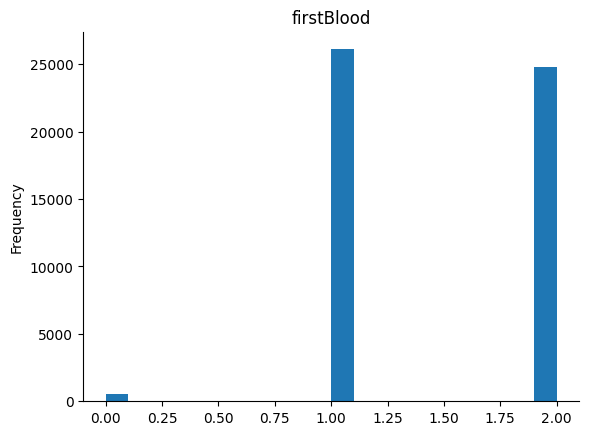

In [ ]:
# @title firstBlood

from matplotlib import pyplot as plt
data['firstBlood'].plot(kind='hist', bins=20, title='firstBlood')
plt.gca().spines[['top', 'right',]].set_visible(False)

Now let's check the data set for missing data.

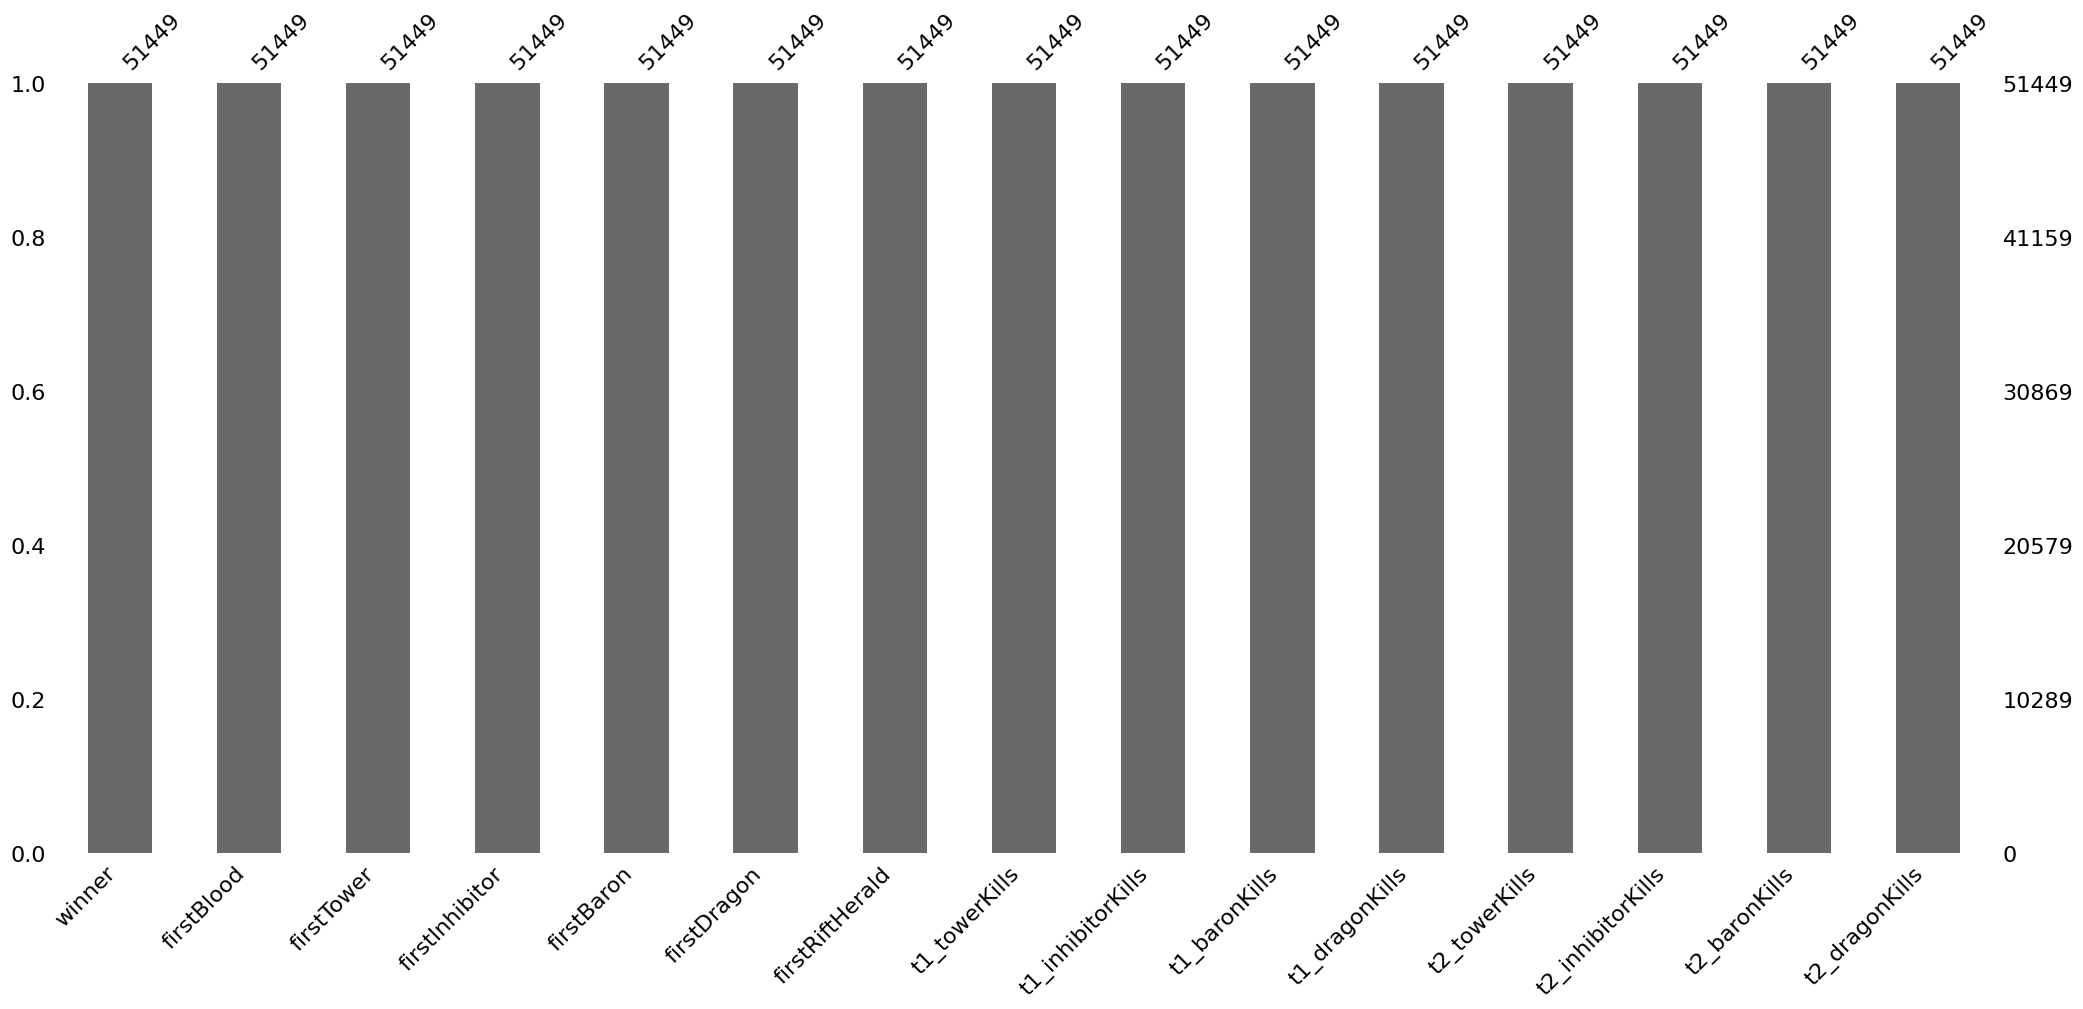

In [ ]:
import missingno as msno
msno.bar(data)
plt.show()

In [ ]:
first_team=data[data.winner==1]
second_team=data[data.winner==2]

Following subplots shows probabilities of Different Features when a team wins.

For example

In matches with first team win:

- The probability of taking first blood of first team is about %59.
- The probability of taking first blood of second team is about %39.
- The probability of taking first blood of any team is about %0.98 (early surrender)

In matches with second team win:

- The probability of taking first blood of first team is about %41.
- The probability of taking first blood of second team is about %57.
- The probability of taking first blood of any team is about %0.1 (early surrender)

etc..

and also we see that the most important factor in winning matches is to take the **first inhibitor** or the **first tower**.

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Replace with your data
# Example placeholders for `first_team` and `second_team` data:
# Ensure these are Pandas DataFrame objects or similar data structures
import pandas as pd
first_team = pd.DataFrame({
    'firstBlood': [0, 1, 2, 1],
    'firstTower': [1, 0, 2, 1],
    'firstBaron': [2, 1, 0, 1],
    'firstInhibitor': [0, 2, 1, 2],
    'firstDragon': [1, 1, 2, 0],
    'firstRiftHerald': [2, 0, 1, 2]
})

second_team = pd.DataFrame({
    'firstBlood': [1, 2, 0, 2],
    'firstTower': [2, 1, 0, 2],
    'firstBaron': [0, 2, 1, 2],
    'firstInhibitor': [1, 0, 2, 1],
    'firstDragon': [2, 0, 1, 1],
    'firstRiftHerald': [0, 2, 1, 0]
})

# Histogram traces
traces = [
    go.Histogram(
        x=first_team[column],
        text=['0-None', '1- First Team', '2- Second Team'],
        histnorm='probability',
        marker=dict(color=color, line=dict(color='black', width=2)),
        opacity=0.75
    )
    for column, color in zip(
        ['firstBlood', 'firstTower', 'firstBaron', 'firstInhibitor', 'firstDragon', 'firstRiftHerald'],
        ['crimson', 'grey', 'pink', 'purple', 'brown', 'orange']
    )
] + [
    go.Histogram(
        x=second_team[column],
        text=['0-None', '1- First Team', '2- Second Team'],
        histnorm='probability',
        marker=dict(color=color, line=dict(color='black', width=2)),
        opacity=0.7
    )
    for column, color in zip(
        ['firstBlood', 'firstTower', 'firstBaron', 'firstInhibitor', 'firstDragon', 'firstRiftHerald'],
        ['blue', 'yellow', 'green', 'slateblue', 'red', 'yellowgreen']
    )
]

# Create subplots
fig = make_subplots(rows=6, cols=2, vertical_spacing=0.1)

# Append traces to subplots
for i, trace in enumerate(traces):
    row = i // 2 + 1
    col = i % 2 + 1
    fig.append_trace(trace, row, col)

# Update layout
fig.update_layout(
    annotations=[
        dict(showarrow=False, text="Teams", x=0.5, y=-0.1, xref="paper", yref="paper", font=dict(size=15)),
        dict(showarrow=False, text="Probabilities", x=-0.08, y=0.5, xref="paper", yref="paper", textangle=270, font=dict(size=15)),
    ] + [
        dict(
            showarrow=False,
            text=f"{event} When {'First' if i % 2 == 0 else 'Second'} Team Wins",
            x=0.13 if i % 2 == 0 else 0.88,
            y=1 - 0.15 * (i // 2),
            xref="paper",
            yref="paper",
            font=dict(size=10)
        )
        for i, event in enumerate([
            "First Blood", "First Tower", "First Baron", "First Inhibitor", "First Dragon", "First Rift Herald"
        ] * 2)
    ],
    height=800,
    font=dict(family="Franklin Gothic", size=10),
    showlegend=False,
    bargap=0.4,
    title="Probabilities of First Blood etc. When a Team Wins",
    plot_bgcolor="snow",
    bargroupgap=0.1,
    paper_bgcolor='rgb(243, 243, 243)'
)

# Plot the figure
iplot(fig)


Following table and subplots show average number of tower, inhibitor, Baron and dragon kills each team has.

In [ ]:
data_new=data[["winner","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills"]]
data_new.groupby("winner").mean()


,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
winner,,,,,,,,
1,8.607006,1.830696,0.586188,1.953142,2.558381,0.166270,0.172914,0.804617
2,2.729627,0.186086,0.153740,0.809586,8.622831,1.825562,0.662771,2.021092


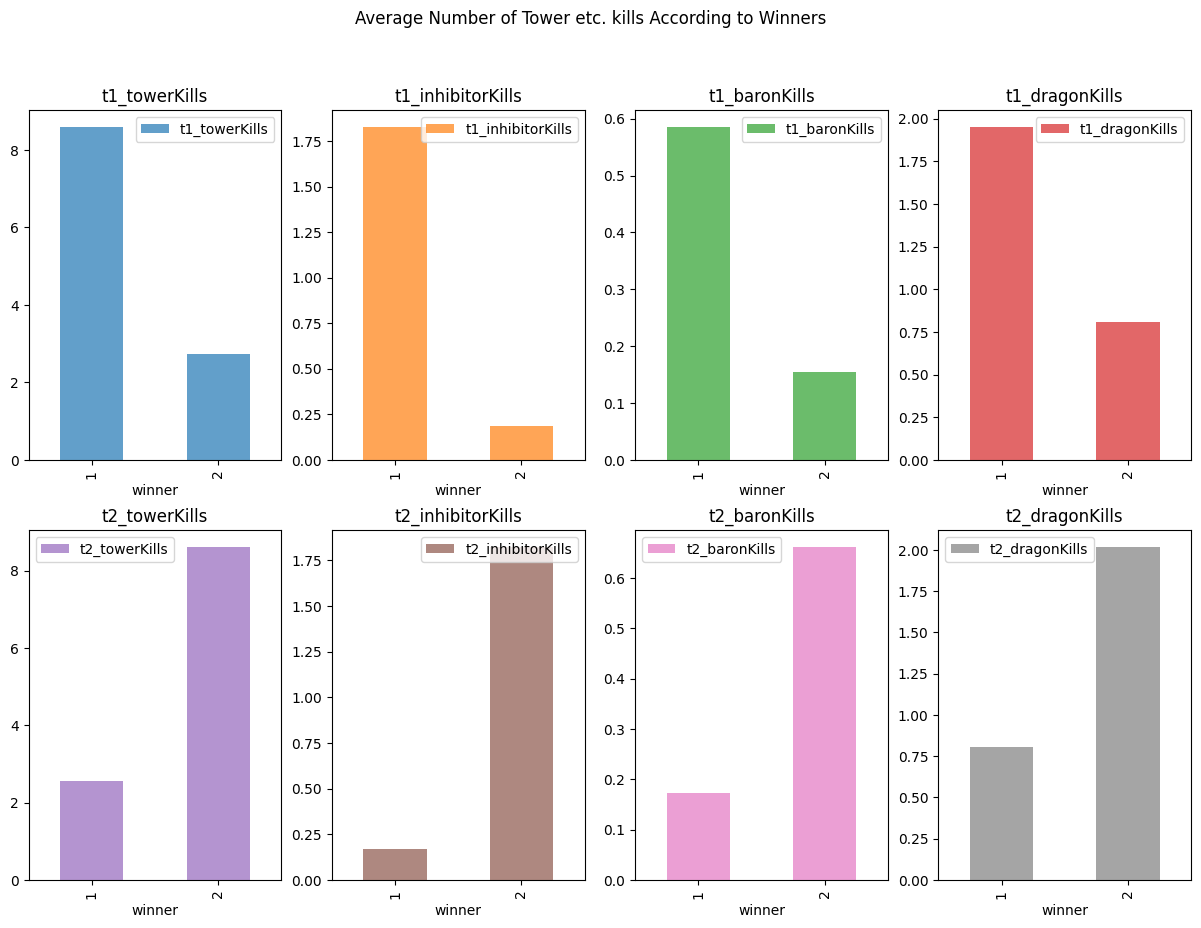

In [ ]:
f=data_new.groupby("winner").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,4),alpha=0.7,title="Average Number of Tower etc. kills According to Winners")
f= sns.set_style("darkgrid")
f=sns.set_context("paper")
plt.show()

In [ ]:
y = data["winner"].values
x = data.drop(["winner"],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

<a id="3"></a> <br>
**Decision Tree with Grid Search Method**

To develop best model we searched best parameters. To find that we used Grid Search Method.

In [ ]:
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [ ]:
grid_decision_tree.fit(x_train,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

best score:  0.9693175528714891
best param:  {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}


And we found best parameters : criterion parameter as entropy , max depth is 7 and splitter is best. And then we test our model.

In [ ]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(x_train,y_train)
print("score:", dt2.score(x_test,y_test))

score: 0.9663103336572725


Our model is working with about 97% accuracy. Following figure shows decision tree:

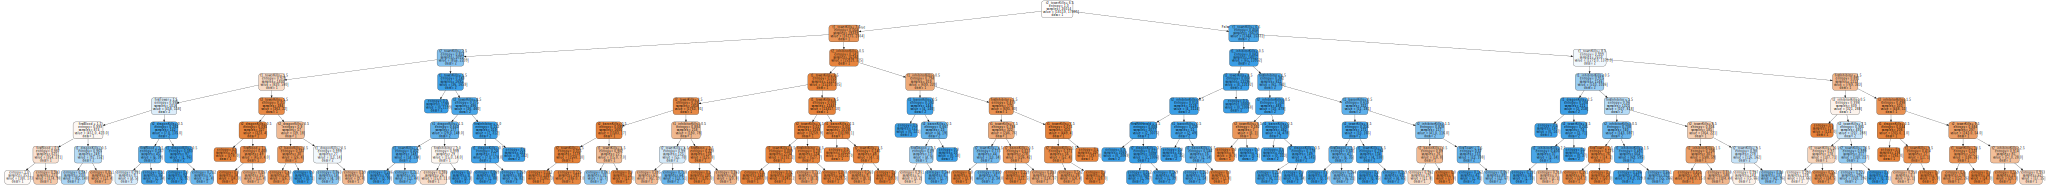

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=x.columns,class_names=["1","2"],
                     filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

To evaluate our model, I used confusion matrix and classification report.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
predicted_values = dt2.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
cr=classification_report(y_test,predicted_values)
print('Classification report : \n',cr)

Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97      7917
           2       0.97      0.96      0.97      7518

    accuracy                           0.97     15435
   macro avg       0.97      0.97      0.97     15435
weighted avg       0.97      0.97      0.97     15435



Text(0.5, 22.71666666666666, 'y_head')

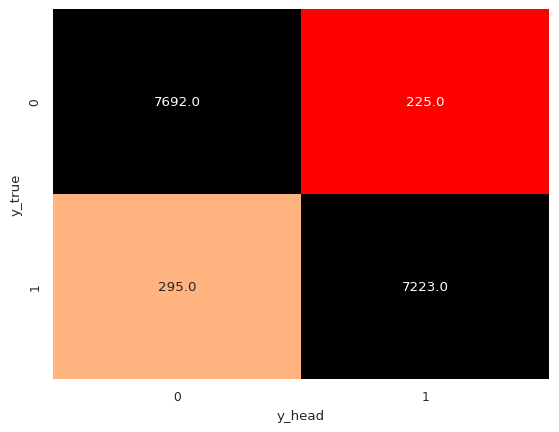

In [ ]:
g1 = sns.heatmap(cm,annot=True,fmt=".1f",cmap="flag",cbar=False)
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')

As seen in the confusion matrix, our models knew 226 matches which win First team as  Second Team. Also it knew 295 matches which win Second Team as First Team. Now let's implement.

<a id="4"></a> <br>
**LET'S TRY!**

Let's say:

First team took First Blood, First Tower, First Baron, First Dragon and First Rift Herald and Second team only took First Inhibitor. And

Team1 numbers of tower, inhibitor, Baron and dragon kills are 10,2,1,4 respectively and

Team2 numbers of tower, inhibitor, Baron and dragon kills are 7,2,1,1 respectively.


In [ ]:
scenario={"feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t2_tower","t2_inhibitor","t2_baron","t2_dragon"],
         "value":[1,1,0,0,2,2,5,0,0,2,1,0,0,1]}
scen=pd.DataFrame(scenario)
scen.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
feature,first_blood,first_tower,first_inhibitor,first_Baron,first_Dragon,first_RiftHerald,t1_tower,t1_inhibitor,t1_baron,t1_dragon,t2_tower,t2_inhibitor,t2_baron,t2_dragon
value,1,1,0,0,2,2,5,0,0,2,1,0,0,1


In [ ]:
x1=[[1,1,0,0,2,2,5,0,0,2,1,0,0,1]]
c=dt2.predict_proba(x1).reshape(-1,1)
print("winner is :" , dt2.predict(x1) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [99.78339350180505] 
second team win probability is %: [0.21660649819494585]


Our model says The winner will be First Team with 85% probability.

WHAT HAPPENED EARLY SURRENDER SITUATION?

In addition, at the beginning of the LOL game players can give an early surrender as a result of AFK. In this case, if the first blood is not shed, our model predicts the result of the match as 51% - 49%.

In [ ]:
x2=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c=dt2.predict_proba(x2).reshape(-1,1)
print("winner is :" , dt2.predict(x2) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [50.991501416430594] 
second team win probability is %: [49.008498583569406]


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(dt2, '/content/decision_tree_model.pkl')

print("Model saved as decision_tree_model.pkl")


Model saved as decision_tree_model.pkl


In [ ]:
!pip install streamlit pyngrok joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving decision_tree_model.pkl to decision_tree_model (1).pkl


In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('decision_tree_model.pkl')

# Set up Streamlit app interface
st.title('Game Outcome Prediction')

# Input fields for Team 1 and Team 2's data
st.header('Enter the features for prediction')

# Create two columns for Team 1 and Team 2 input fields (cards layout)
col1, col2 = st.columns(2)

# Team 1 Inputs (First team) on the left side (col1)
with col1:
    st.subheader("Team 1")
    team1_first_blood = st.selectbox('Did Team 1 take First Blood?', ['Yes', 'No'])
    team1_first_tower = st.selectbox('Did Team 1 take First Tower?', ['Yes', 'No'])
    team1_first_baron = st.selectbox('Did Team 1 take First Baron?', ['Yes', 'No'])
    team1_first_dragon = st.selectbox('Did Team 1 take First Dragon?', ['Yes', 'No'])
    team1_first_rift_herald = st.selectbox('Did Team 1 take First Rift Herald?', ['Yes', 'No'])

    team1_tower_kills = st.number_input('Number of Tower Kills for Team 1:', min_value=0)
    team1_inhibitor_kills = st.number_input('Number of Inhibitor Kills for Team 1:', min_value=0)
    team1_baron_kills = st.number_input('Number of Baron Kills for Team 1:', min_value=0)
    team1_dragon_kills = st.number_input('Number of Dragon Kills for Team 1:', min_value=0)

# Team 2 Inputs (Second team) on the right side (col2)
with col2:
    st.subheader("Team 2")
    team2_first_inhibitor = st.selectbox('Did Team 2 take First Inhibitor?', ['Yes', 'No'])

    team2_tower_kills = st.number_input('Number of Tower Kills for Team 2:', min_value=0)
    team2_inhibitor_kills = st.number_input('Number of Inhibitor Kills for Team 2:', min_value=0)
    team2_baron_kills = st.number_input('Number of Baron Kills for Team 2:', min_value=0)
    team2_dragon_kills = st.number_input('Number of Dragon Kills for Team 2:', min_value=0)

# Shared feature labels (between the two columns)
st.markdown("""
    <div style="display: flex; justify-content: center; align-items: center; font-size: 20px;">
        <p style="width: 250px; text-align: center;">Shared Features</p>
    </div>
""", unsafe_allow_html=True)

# Mapping inputs to numerical values (for prediction)
team1_first_blood = 1 if team1_first_blood == 'Yes' else 0
team1_first_tower = 1 if team1_first_tower == 'Yes' else 0
team1_first_baron = 1 if team1_first_baron == 'Yes' else 0
team1_first_dragon = 1 if team1_first_dragon == 'Yes' else 0
team1_first_rift_herald = 1 if team1_first_rift_herald == 'Yes' else 0
team2_first_inhibitor = 1 if team2_first_inhibitor == 'Yes' else 0

# When the user clicks 'Predict', make the prediction
if st.button('Predict'):
    # Prepare the input data in the same format as the model was trained on
    input_data = np.array([[team1_first_blood, team1_first_tower, team1_first_baron,
                            team1_first_dragon, team1_first_rift_herald, team2_first_inhibitor,
                            team1_tower_kills, team1_inhibitor_kills, team1_baron_kills,
                            team1_dragon_kills, team2_tower_kills, team2_inhibitor_kills,
                            team2_baron_kills, team2_dragon_kills]])

    # Get prediction from the model
    prediction = model.predict(input_data)

    # Get prediction probabilities from the model
    prediction_proba = model.predict_proba(input_data)

    # Display the result
    if prediction == 1:
        st.success("Team 1 wins!")
    else:
        st.success("Team 2 wins!")

    # Show the probabilities of each class
    st.subheader("Prediction Probabilities:")
    st.write(f"Probability of Team 1 winning: {prediction_proba[0][1]:.2f}")
    st.write(f"Probability of Team 2 winning: {prediction_proba[0][0]:.2f}")


2024-12-18 23:47:51.802 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 23:47:51.948 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-18 23:47:51.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 23:47:51.953 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 23:47:51.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 23:47:51.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 23:47:51.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 23:47:51.964 Thread 'MainThread': mi

In [ ]:
!streamlit run app.py &>/content/logs.txt &


In [ ]:
!pip install pyngrok

from pyngrok import ngrok
public_url = ngrok.connect(8501)  # Replace 8501 with the port of your local service
print(f"Public URL: {public_url}")


ERROR:pyngrok.process.ngrok:t=2024-12-18T23:51:02+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-12-18T23:51:02+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-12-18T23:51:02+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
import os
from pyngrok import ngrok

# Start the Streamlit app
os.system("streamlit run your_app.py &")  # Replace 'your_app.py' with the name of your Streamlit app

# Expose the Streamlit app via ngrok
public_url = ngrok.connect(8501)  # Streamlit runs on port 8501 by default
print(f"Public URL: {public_url}")


NameError: name 'ngrok' is not defined